# ETL - EDA

### Accidentes Aéreos

In [31]:
import pandas as pd
import numpy as np
from datetime import datetime
import time
import missingno as msno

In [32]:
df = pd.read_csv('AccidentesAviones.csv', sep=',')

In [33]:
df.head(2)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...


In [34]:
df.tail(2)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."
5007,5007,"July 06, 2021",1500,"Palana, Russia",Kamchatka Aviation Enterprise,251,Petropavlovsk - Palana,Antonov An 26B-100,RA-26085,12310,28,22,6,28,22,6,0,The passenger plane crashed into the top of a ...


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5008 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

### Observar que no hay registros con valores nulos, donde faltan datos está indicado con el símbolo '?'

In [36]:
# Cambio el nombre de las variables
df.rename(columns ={'Unnamed: 0': 'index', 'fecha': 'date', 'HORA declarada': 'time', 'Ruta': 'location', 'OperadOR': 'operator', 'PASAJEROS A BORDO': 'passenger_aboard', 'cantidad de fallecidos': 'total_deaths'},inplace=True)

In [37]:
df.columns

Index(['index', 'date', 'time', 'location', 'operator', 'flight_no', 'route',
       'ac_type', 'registration', 'cn_ln', 'all_aboard', 'passenger_aboard',
       'crew_aboard', 'total_deaths', 'passenger_fatalities',
       'crew_fatalities', 'ground', 'summary'],
      dtype='object')

Diccionario de Variables:

    index: índece del dataset
    date : fecha del accidente
    time : hora declarada en la que se produjo el accidente
    location : ubicación del accidente
    operator : responsable del vuelo
    flight_no : número de vuelo
    route : objetivo del vuelo, describe una actividad o un trayecto(origen,destino)
    ac_type : tipo de aeronave
    registration : matrícula de la aeronave
    cn/In : Número de serie de la aeronave
    all_aboard : personas a bordo
    passenger_aboard: pasajeros a bordo
    total_deaths
    passenger_fatalities : cantidad de pasajeros fallecidos
    crew_fatalities : cantidad de tripulantes fallecidos
    ground : cantidad de víctimas terrestres
    Summary : descripción

## - Detección de Registros Duplicados

In [38]:
df.drop('index', axis=1).duplicated().sum()

0

## - Detección de Valores Faltantes

In [39]:
print('Valores Faltantes ','\n')

col = df.columns
for e in col:
    print(e,'\t',round(len(df[e][df[e]=='?'])/len(df)*100,2),'%')

Valores Faltantes  

index 	 0.0 %
date 	 0.0 %
time 	 30.03 %
location 	 0.1 %
operator 	 0.2 %
flight_no 	 73.52 %
route 	 15.22 %
ac_type 	 0.26 %
registration 	 5.43 %
cn_ln 	 13.32 %
all_aboard 	 0.34 %
passenger_aboard 	 4.41 %
crew_aboard 	 4.37 %
total_deaths 	 0.16 %
passenger_fatalities 	 4.69 %
crew_fatalities 	 4.69 %
ground 	 0.88 %
summary 	 1.18 %


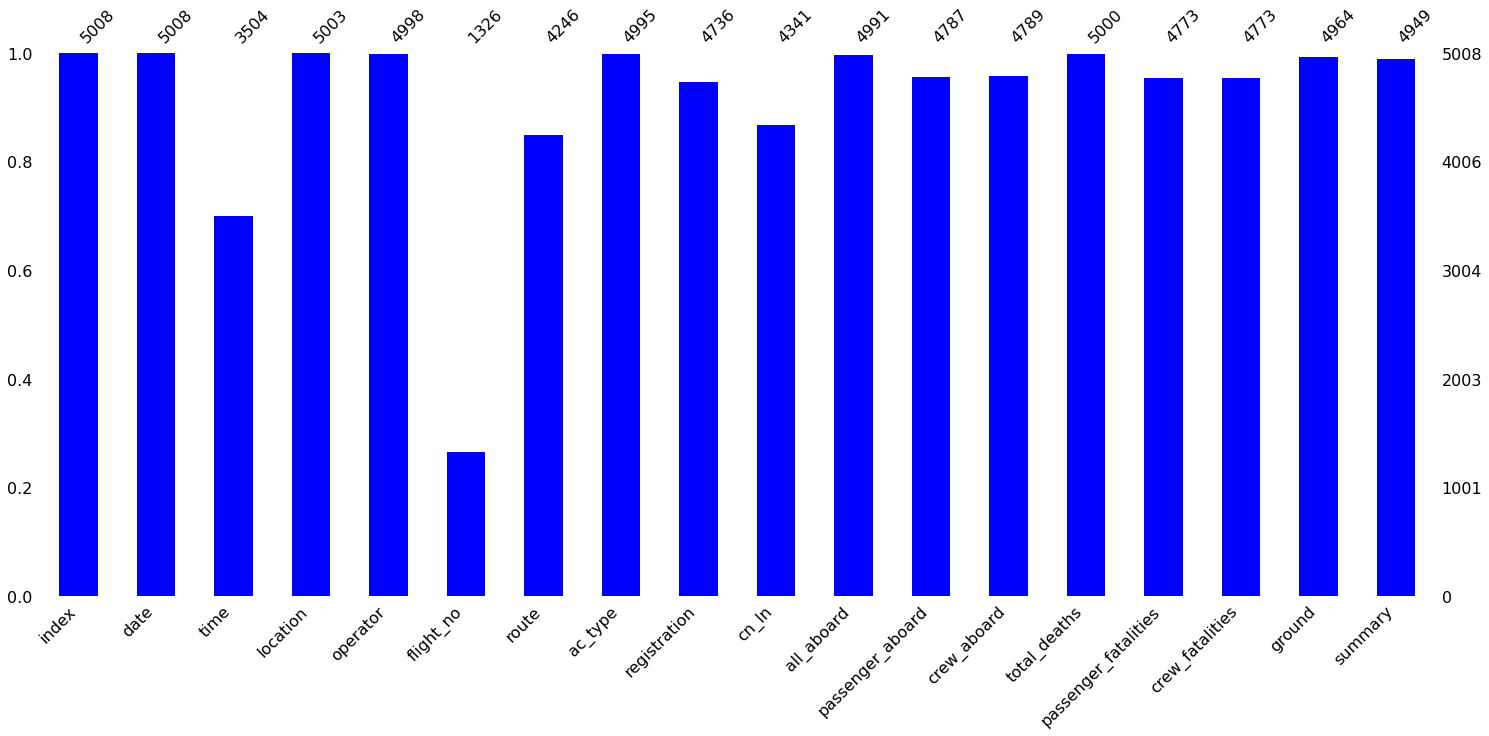

In [40]:
msno.bar(df[df!='?'], color='blue');

Se puede ver que los datos en general están completos en su totalidad, concentrandose la mayor cantidad de datos faltantes en columnas de menor relevancia

In [41]:
# Pocentaje total de registros donde falta algún dato sobre los tripulantes y pasajeros de la nave
len(df[(df.all_aboard=='?') | (df.passenger_aboard=='?') | (df.crew_aboard=='?') | (df.total_deaths=='?') | (df.passenger_fatalities=='?') | (df.crew_fatalities=='?')])/len(df) *100

4.852236421725239

In [42]:
# Elimino los que presentan el conjunto de variables sobre tripulantes y pasajeros sin datos debido a que son pocos registros

columnas = ['all_aboard', 'passenger_aboard', 'crew_aboard', 'total_deaths', 'passenger_fatalities', 'crew_fatalities']
condiciones = [(df.all_aboard=='?') , (df.passenger_aboard=='?') , (df.crew_aboard=='?') , (df.total_deaths=='?') , (df.passenger_fatalities=='?') , (df.crew_fatalities=='?')]

for col in columnas:
    for cond in condiciones:
        df.drop((df[col][cond==True]).index, inplace=True)

# Verifico cantidad de registros
len(df)

4765

In [43]:
# Elimino los registros sin datos sobre la ubicación del accidente
df.drop((df.location[(df.location=='?')==True]).index, inplace=True)

#Verifico cantidad de registros
len(df)


4760

In [44]:
# Verifico ground
print('faltantes: ', len(df)-len(df.drop((df.ground[(df.ground=='?')==True]).index)))

faltantes:  27


## - Normalización de variables

### - date

* Detección de irregularidades

In [45]:
df['date'][df['date'].str.isalnum() == False].unique()

array(['September 17, 1908', 'September 07, 1909', 'July 12, 1912', ...,
       'May 21, 2021', 'June 10, 2021', 'July 06, 2021'], dtype=object)

* Correción

In [46]:
df['date']=pd.to_datetime(df['date'])

### - hora

* Detección de irregularidades

In [47]:
df['time'][df['time'].str.isalnum() == False].unique()

array(['?', 'c 18:00', 'c 12:00', 'c 13:15', '10:00', '14:48', 'c 11:00',
       'c 9:15', '11:30', 'c 10:00', '08:00', '10:45', '09:18', 'c 17:00',
       '18:23', '17:30', 'c:17:00', '15:00', 'c 15:45', '09:45',
       'c: 2:00', 'c 16:00', '02:00', 'c 08:00', 'c:09:00', '02:07',
       '14:30', 'c 13:00', 'c 20:40', '21:30', 'c 23:00', '10:50',
       'c 09:00', 'c 20:35', '17:15', 'c 15:00', '03:59', '18:25',
       '11:03', '02:47', '08:12', '17:00', '20:55', '11:45', 'c 11:15',
       'c 01:00', '13:00', '07:40', '10:30', '13:15', '20:10', '21:10',
       '06;15', '04:19', '09:15', 'c 02:00', '01:17', '09:31', 'c 03:30',
       '07:30', '11:20', '04:33', '20:00', '00:57', '03:30', '03:41',
       '08:18', 'c 20:15', '23:30', 'c 10:30', '13:10', '19:19', '02:09Z',
       '09:19', 'c 20:00', '04:20', '22:05', '07:20', 'c 13:40', '09:50',
       '20:05', '16:22', '19:56', '11:00', '09:40', '12:20', '17:04',
       '12:10', '16:00', '14:10', '19:00', '14:00', '00:25', '10:55',
      

* Corrección

In [48]:
df['time'] = df['time'].replace('?', np.nan) 

In [49]:
df['time'] = df['time'].str.replace('[;, c ,:,Z]', '') 

C:\Users\barce\AppData\Local\Temp\ipykernel_6348\2212954589.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['time'] = df['time'].str.replace('[;, c ,:,Z]', '')


* Verificación

In [50]:
df['time'][df['time'].str.isalnum() == False].unique()

array([], dtype=object)

In [51]:
df.time = df.time.astype(str)

In [52]:
df.time.head(3)

0    1718
1     nan
2    0630
Name: time, dtype: object

In [53]:
df['time'] = pd.to_datetime(df.time, format='%H%M').dt.time

### - Imputación Valores Faltantes

* Columnas: 'ruta', 'operador', 'flight_no','route', 'ac_type', 'registration', 'cn_ln', 'ground'

In [54]:
# Indico 'sin dato' donde está incompleto el registro
df['location'] = df['location'].replace('?', 'sin dato')
df['operator'] = df['operator'].replace('?', 'sin dato')
df['flight_no'] = df['flight_no'].replace('?', 'sin dato')
df['route'] = df['route'].replace('?', 'sin dato')
df['ac_type'] = df['ac_type'].replace('?', 'sin dato')
df['registration'] = df['registration'].replace('?', 'sin dato')
df['cn_ln'] = df['cn_ln'].replace('?', 'sin dato')

In [55]:
# Remplazo '?' por np.nan
df['ground'] = df['ground'].replace('?', '0')

### - Inspección variables Cuantitativas

In [56]:
# Transformo el tipo de variable
columnas = df.columns[10:-1]

for col in columnas:
    df[col] = df[col].astype(int);

In [57]:
df[columnas].describe(exclude=[np.object0])

,all_aboard,passenger_aboard,crew_aboard,total_deaths,passenger_fatalities,crew_fatalities,ground
count,4760.000000,4760.000000,4760.000000,4760.00000,4760.000000,4760.000000,4760.000000
mean,31.392647,26.885084,4.517647,22.50063,18.983824,3.588866,1.760714
std,46.148115,44.115796,3.762337,35.69067,34.100847,3.175752,56.661892
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,6.000000,3.000000,2.000000,4.00000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.00000,8.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.00000,21.000000,5.000000,0.000000
max,644.000000,614.000000,83.000000,583.00000,560.000000,43.000000,2750.000000


Los outliers no serán quitados debido a que son representativos del accidente, por ejemplo la variable 'ground' que indica la cantidad de personas que murieron y que se encontraban en tierra, presenta valores máximos de 2750 muertes, los cuales están relacionados con el atentado a la Torres Gemelas.

In [58]:
df[df.all_aboard==644]

,index,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,all_aboard,passenger_aboard,crew_aboard,total_deaths,passenger_fatalities,crew_fatalities,ground,summary
2902,2902,1977-03-27,17:07:00,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,19643/11 / 20400/157,644,614,30,583,560,23,0,Both aircraft were diverted to Tenerife becaus...


## - Análisis de datos para selección de temática a tratar

### - WordCloud: 'summary'

Busco las palabras claves de la columna 'summary' para ver si consigo información útil referente a las causas de los eventos eventos, para ello realizo una nube de palabras para identificar su relevancia, además aplico un filtro para ir quitando palabras irrelevantes

In [59]:

from stop_words import get_stop_words

palabras_irrelevantes = get_stop_words('english')

lista = ['crashed', 'aircraft', 'plane', 'runway', 'crew', 'flight', 'takeoff', 'taking', 'due', 'airport', 'attempting', 'landing', 'approach', 'land', 'en route', 'en', 'flying', 'pilot', 'feet', 'ft', 'flew', 'cargo', 'route', 'two', 'control', 'failed', 'shortly', 'accident', 'loss', 'lost', 'minute', 'killed', 'passenger', 'causing', 'caused', 'left', 'attempt', 'aboard', 'reported', 'part', 'final', 'helicopter', 'resulting', 'procedure', 'resulted', 'emergency', 'aircraft']
for palabra in lista:
    palabras_irrelevantes.append(palabra)

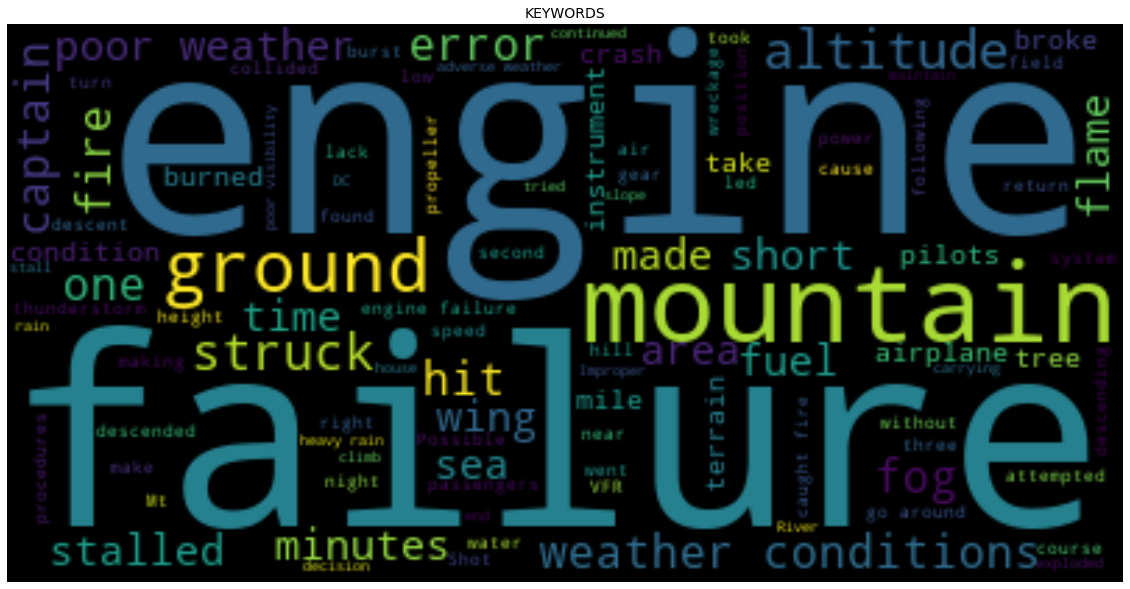

In [60]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = str(df.summary.tolist())

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="black", max_words=100,
               stopwords=palabras_irrelevantes)
wc.generate(text)

plt.figure(figsize=(20,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('KEYWORDS', loc='Center', fontsize=14)
plt.show()

Analizando la nube de palabras, se puede apreciar que predominan las que están relacionadas a lo clímatico, geográfico, operacional, mecánico y estructural.

### - Localidades con más accidentes fatales

In [61]:
df.location.value_counts().head(15)

Manila, Philippines       15
Moscow, Russia            15
New York, New York        14
Bogota, Colombia          12
Sao Paulo, Brazil         12
Rio de Janeiro, Brazil    12
Cairo, Egypt              12
Near Moscow, Russia       10
Chicago, Illinois         10
Tehran, Iran               9
Rome, Italy                8
London, England            8
Denver, Colorado           8
Ankara, Turkey             8
Burbank, California        7
Name: location, dtype: int64

In [62]:
df[df.location=='Manila, Philippines'];

### - Fechas con más accidentes fatales

In [63]:
df.date.value_counts().head(15)

2001-09-11    4
1947-05-29    3
2005-01-13    3
1945-02-23    3
1971-07-30    3
1962-09-10    3
1970-12-31    3
1957-05-13    3
1951-07-12    3
1988-01-18    3
1944-11-29    3
1985-10-11    3
1962-03-08    3
1974-01-06    3
1978-09-03    3
Name: date, dtype: int64

La información indica que la fecha con más "accidentes" aéreos corresponde al atentado del 11 de septiembre del 2001.

### - Operador con más accidentes fatales

In [64]:
df.operator.value_counts().head(15)

Aeroflot                               246
Military - U.S. Air Force              132
Air France                              65
Deutsche Lufthansa                      62
United Air Lines                        44
Military - U.S. Army Air Forces         43
Pan American World Airways              40
China National Aviation Corporation     36
American Airlines                       36
Indian Airlines                         34
US Aerial Mail Service                  34
KLM Royal Dutch Airlines                34
Philippine Air Lines                    33
Private                                 31
Military - U.S. Navy                    27
Name: operator, dtype: int64

### - Colisión entre aviones (será mi temática principal)

Detecté que en la columna 'operator' puede figurar más de una aerolínea por registro, los cual indica que hubo un impacto entre dos aeronaves. La separación entre los nombres esta dada por '/'

In [65]:
double_impact = df['operator'][df['operator'].str.isalnum() == False].unique()
double_impact = pd.Series(double_impact)
double_impact = double_impact[double_impact.str.contains('/')]

len(double_impact[double_impact.str.contains('/')])

92

In [66]:
df[df.operator=='Pan American World Airways / KLM']

,index,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,all_aboard,passenger_aboard,crew_aboard,total_deaths,passenger_fatalities,crew_fatalities,ground,summary
2902,2902,1977-03-27,17:07:00,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,19643/11 / 20400/157,644,614,30,583,560,23,0,Both aircraft were diverted to Tenerife becaus...


In [67]:
df[df.operator=='Daimler Airways / Grands Express Aeriens']

,index,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,all_aboard,passenger_aboard,crew_aboard,total_deaths,passenger_fatalities,crew_fatalities,ground,summary
66,66,1922-04-07,13:15:00,"Grandvilliers, France",Daimler Airways / Grands Express Aeriens,sin dato,Croydon - Le Bourget,de Havilland DH-18 / Farman F-60 Goliath,G-EAOW/FGEAD,4,7,5,2,7,5,2,0,A midair collision occurred at 400 ft. in poor...


In [68]:
# Cantidad de colisiones entre las mismas aerolineas
df.operator[df.operator.isin(double_impact)].value_counts().head(7)

Aeroflot / Aeroflot                                      3
United Air Lines / Trans World Airlines                  2
Military - U.S. Air Force / Military - U.S. Air Force    2
Military - U.S. Air Force / U.S. Air Force               2
Trans World Airlines / Private                           2
Piedmont Airlines / Private                              2
Grand Canyon Airlines / Helitech                         1
Name: operator, dtype: int64

In [69]:
# Separo las aerolineas en dos columnas
s = pd.Series(df.operator[df.operator.isin(double_impact)])
s = pd.DataFrame(s.str.split(pat='/', expand=True))

s0 = pd.DataFrame(s[0].value_counts())
s1 = pd.DataFrame(s[1].value_counts())

# Cantidad de repeticiones de aerolineas por columna 
print(s0,s1)

                             0
Aeroflot                     7
Military - U.S. Air Force    5
Trans World Airlines         4
Eastern Air Lines            3
United Air Lines             3
...                         ..
Maddux Airlines              1
Inex Adria Aviopromet        1
Pan American World Airways   1
Pacific Southwest Airlines   1
Helicopters Inc              1

[77 rows x 1 columns]                                   1
 Private                         20
 Aeroflot                         3
 Military - U.S. Navy             3
 Military - U.S. Air Force        3
 Trans World Airlines             2
...                              ..
 Military - US Marine Air Corps   1
  Japanese Air Force              1
PENAS                             1
 Military - U.S.Army Air Force    1
 KOMO TV                          1

[70 rows x 1 columns]


In [70]:
filter_d_imp = list(double_impact)
df_extra = df[df.operator.isin(filter_d_imp)]
div = df_extra.operator.str.split(pat='/', expand=True)

df_extra = pd.concat([df_extra,div], axis=1);

In [71]:
df_extra.rename(columns={0:'operator_1',1:'operator_2'}, inplace=True)

In [72]:
df_extra.to_csv('double_impact.csv',index=False)

---

---

---

### - Importación del df a la base de datos de MySQL

In [ ]:
df.drop(['summary','index'],axis=1,inplace=True)
df_extra.drop(['summary','index'],axis=1,inplace=True)

In [ ]:
from ruta import *

In [ ]:
df.to_sql('accident', conection, if_exists='append', index=False)
df_extra.to_sql('double_impact', conection, if_exists='append', index=False)

99